Экономика США
Дано: перепись населения и географические данные, энергетические данные в каждом штате за год в период с 2010 по 2014 год 
Будем рассматривать ВВП за год 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Загружаем данные

In [2]:
data = pd.read_csv('Energy_Census_and_Economic_Data_US_2010-2014.csv', sep = ',', engine = 'python')

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data

,StateCodes,State,Region,Division,Coast,Great Lakes,TotalC2010,TotalC2011,TotalC2012,TotalC2013,...,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014
0,AL,Alabama,3.0,6.0,1.0,0.0,1931522,1905207,1879716,1919365,...,1.165832,1.157861,-0.020443,-0.168414,0.396416,0.420102,1.011941,1.001333,1.562247,1.577963
1,AK,Alaska,4.0,9.0,1.0,0.0,653221,653637,649341,621107,...,3.203618,2.869760,-1.175137,-1.949571,-3.789313,-13.754494,0.948185,1.835376,-0.585695,-10.884734
2,AZ,Arizona,4.0,8.0,0.0,0.0,1383531,1424944,1395839,1414383,...,1.090035,1.091283,1.341472,-0.420875,-0.580562,-1.313050,2.317801,0.621971,0.509473,-0.221767
3,AR,Arkansas,3.0,7.0,0.0,0.0,1120632,1122544,1067642,1096438,...,2.141877,2.129805,1.369514,5.131282,3.910476,6.280636,3.336628,7.155212,6.052353,8.410441
4,CA,California,4.0,9.0,1.0,0.0,7760629,7777115,7564063,7665241,...,4.207353,4.177389,-1.162079,-1.173951,-1.341226,-0.830982,2.761377,2.772770,2.866127,3.346406
5,CO,Colorado,4.0,8.0,0.0,0.0,1513547,1470445,1440781,1470844,...,2.074200,2.010735,5.183397,5.553675,6.977583,7.587163,6.933159,7.660864,9.051783,9.597898
6,CT,Connecticut,1.0,1.0,1.0,0.0,764970,739130,725019,754901,...,4.753602,4.730950,-3.384435,-5.611492,-4.731638,-7.286252,1.116894,-1.059166,0.021964,-2.555302
7,DE,Delaware,3.0,5.0,1.0,0.0,250212,272568,273728,273716,...,2.608949,2.565489,2.866848,3.598380,3.397171,5.148174,5.303282,6.221263,6.006120,7.713663
8,FL,Florida,3.0,5.0,1.0,0.0,4282673,4141711,4029903,4076406,...,5.783717,5.687300,5.540393,5.125320,4.918783,7.016123,11.359606,10.722573,10.702501,12.703423
9,GA,Georgia,3.0,5.0,1.0,0.0,3100144,2982837,2767491,2782782,...,2.510526,2.470423,1.105816,1.852201,-0.576888,2.200467,3.375007,4.426268,1.933638,4.670890


Получили таблицу из 52 строк (51 штат и общее по США) и 192 столбцов(значения различных экономических параметров)

In [5]:
print(data)

   StateCodes                 State  Region  Division  Coast  Great Lakes  \
0          AL               Alabama     3.0       6.0    1.0          0.0   
1          AK                Alaska     4.0       9.0    1.0          0.0   
2          AZ               Arizona     4.0       8.0    0.0          0.0   
3          AR              Arkansas     3.0       7.0    0.0          0.0   
4          CA            California     4.0       9.0    1.0          0.0   
5          CO              Colorado     4.0       8.0    0.0          0.0   
6          CT           Connecticut     1.0       1.0    1.0          0.0   
7          DE              Delaware     3.0       5.0    1.0          0.0   
8          FL               Florida     3.0       5.0    1.0          0.0   
9          GA               Georgia     3.0       5.0    1.0          0.0   
10         HI                Hawaii     4.0       9.0    1.0          0.0   
11         ID                 Idaho     4.0       8.0    0.0          0.0   

Первые и последние строки таблицы

In [6]:
data.head()

,StateCodes,State,Region,Division,Coast,Great Lakes,TotalC2010,TotalC2011,TotalC2012,TotalC2013,...,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014
0,AL,Alabama,3.0,6.0,1.0,0.0,1931522,1905207,1879716,1919365,...,1.165832,1.157861,-0.020443,-0.168414,0.396416,0.420102,1.011941,1.001333,1.562247,1.577963
1,AK,Alaska,4.0,9.0,1.0,0.0,653221,653637,649341,621107,...,3.203618,2.869760,-1.175137,-1.949571,-3.789313,-13.754494,0.948185,1.835376,-0.585695,-10.884734
2,AZ,Arizona,4.0,8.0,0.0,0.0,1383531,1424944,1395839,1414383,...,1.090035,1.091283,1.341472,-0.420875,-0.580562,-1.313050,2.317801,0.621971,0.509473,-0.221767
3,AR,Arkansas,3.0,7.0,0.0,0.0,1120632,1122544,1067642,1096438,...,2.141877,2.129805,1.369514,5.131282,3.910476,6.280636,3.336628,7.155212,6.052353,8.410441
4,CA,California,4.0,9.0,1.0,0.0,7760629,7777115,7564063,7665241,...,4.207353,4.177389,-1.162079,-1.173951,-1.341226,-0.830982,2.761377,2.772770,2.866127,3.346406


In [7]:
data.tail()

,StateCodes,State,Region,Division,Coast,Great Lakes,TotalC2010,TotalC2011,TotalC2012,TotalC2013,...,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014
47,WV,West Virginia,3.0,5.0,0.0,0.0,738821,726341,720985,743612,...,0.631283,0.628523,0.586117,0.562068,-1.252861,-1.484373,1.143656,1.171559,-0.621579,-0.855850
48,WI,Wisconsin,2.0,3.0,0.0,1.0,1791199,1778018,1721543,1813458,...,1.129419,1.139079,-1.094924,-1.653887,-1.369743,-1.727053,-0.058431,-0.619224,-0.240324,-0.587974
49,WY,Wyoming,4.0,8.0,0.0,0.0,540122,556548,550182,539146,...,0.858535,0.830923,-0.362194,9.651174,4.547821,-4.577788,0.323325,10.610525,5.406356,-3.746865
50,DC,District of Columbia,3.0,5.0,0.0,0.0,190529,183806,172963,175560,...,5.871584,5.749218,11.332882,10.005838,9.777666,1.793572,16.805955,15.595790,15.649250,7.542790
51,US,United States,NaN,NaN,NaN,NaN,97446021,96827465,94411432,97141368,...,3.168211,3.135081,NaN,NaN,NaN,NaN,2.941968,3.051932,3.168211,3.135081


Количество строк и столбцов

In [8]:
print(data.shape)

(52, 192)


Названия столбцов

In [9]:
print(data.columns)

Index(['StateCodes', 'State', 'Region', 'Division', 'Coast', 'Great Lakes',
       'TotalC2010', 'TotalC2011', 'TotalC2012', 'TotalC2013',
       ...
       'RINTERNATIONALMIG2013', 'RINTERNATIONALMIG2014', 'RDOMESTICMIG2011',
       'RDOMESTICMIG2012', 'RDOMESTICMIG2013', 'RDOMESTICMIG2014',
       'RNETMIG2011', 'RNETMIG2012', 'RNETMIG2013', 'RNETMIG2014'],
      dtype='object', length=192)


In [10]:
data.index

RangeIndex(start=0, stop=52, step=1)

Значение во 2й строке в столбце 'State'

In [11]:
data.at[2, 'State']

'Arizona'

Выведем весь столбец 'State'

In [12]:
data['State']

0                  Alabama
1                   Alaska
2                  Arizona
3                 Arkansas
4               California
5                 Colorado
6              Connecticut
7                 Delaware
8                  Florida
9                  Georgia
10                  Hawaii
11                   Idaho
12                Illinois
13                 Indiana
14                    Iowa
15                  Kansas
16                Kentucky
17               Louisiana
18                   Maine
19                Maryland
20           Massachusetts
21                Michigan
22               Minnesota
23             Mississippi
24                Missouri
25                 Montana
26                Nebraska
27                  Nevada
28           New Hampshire
29              New Jersey
30              New Mexico
31                New York
32          North Carolina
33            North Dakota
34                    Ohio
35                Oklahoma
36                  Oregon
3

In [13]:
data['State'][3]

'Arkansas'

Тип элемента data['State'][3]

In [14]:
type(data['State'][3])

str

In [15]:
type(data['State'])

pandas.core.series.Series

In [16]:
data[['State', 'Region']].head()

,State,Region
0,Alabama,3.0
1,Alaska,4.0
2,Arizona,4.0
3,Arkansas,3.0
4,California,4.0


Характеристики по каждому из параметров

In [17]:
data.describe()

,Region,Division,Coast,Great Lakes,TotalC2010,TotalC2011,TotalC2012,TotalC2013,TotalC2014,TotalP2010,...,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014
count,51.000000,51.000000,51.000000,51.000000,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,...,52.000000,52.000000,51.000000,51.000000,51.000000,51.000000,52.000000,52.000000,52.000000,52.000000
mean,2.666667,5.117647,0.450980,0.156863,3.748043e+06,3.723920e+06,3.631132e+06,3.736541e+06,3.784461e+06,2.759090e+06,...,2.545359,2.501026,0.309307,0.617791,0.773470,-0.086251,2.587748,3.117434,3.303955,2.416433
std,1.051982,2.534932,0.502543,0.367290,1.339845e+07,1.331718e+07,1.298862e+07,1.336881e+07,1.354064e+07,1.038432e+07,...,1.598187,1.569279,3.334579,4.332419,4.776573,4.895949,3.602628,4.383237,4.819083,4.794439
min,1.000000,1.000000,0.000000,0.000000,1.536970e+05,1.504750e+05,1.304120e+05,1.375270e+05,1.398970e+05,9.500000e+01,...,0.631283,0.628523,-5.839158,-5.946809,-5.482049,-13.754494,-3.182714,-3.382339,-3.778986,-10.884734
25%,2.000000,3.000000,0.000000,0.000000,6.488725e+05,6.483915e+05,6.468032e+05,6.499528e+05,6.552158e+05,2.444558e+05,...,1.411803,1.392360,-1.238840,-1.919526,-1.559669,-2.519482,0.421528,0.092413,0.002172,-0.273974
50%,3.000000,5.000000,0.000000,0.000000,1.482116e+06,1.447694e+06,1.417946e+06,1.449638e+06,1.457408e+06,6.383085e+05,...,2.042578,2.019803,0.030893,-0.420875,-0.478459,-1.192172,1.709057,1.642785,2.051458,1.524206
75%,3.500000,7.500000,1.000000,0.000000,2.533853e+06,2.448560e+06,2.378196e+06,2.443520e+06,2.461348e+06,1.499262e+06,...,3.201814,3.142864,2.061860,3.463549,3.498414,3.710544,4.264455,5.460200,5.720351,5.357469
max,4.000000,9.000000,1.000000,1.000000,9.744602e+07,9.682746e+07,9.441143e+07,9.714137e+07,9.838521e+07,7.459311e+07,...,6.426691,6.074495,11.332882,15.589637,23.189451,12.265101,16.805955,17.804574,25.104485,14.028192


В таблице даны значения параметров за 5 лет. Их очень много. Рассмотрим параметры за один год(к примеру, 2014). И будем рассматривать ВВП по каждому штату за этот год. Разделим штаты на "бедные"(ВВП меньше среднего) и "богатые"(ВВП больше среднего)
Значения за 2010-2013г уберем из таблицы.

In [19]:
for name in data.columns: 
    if "2010" in name: 
         data = data.drop(name, axis = 1)

In [20]:
for name in data.columns: 
    if "2011" in name: 
         data = data.drop(name, axis = 1)

In [21]:
for name in data.columns: 
    if "2012" in name: 
         data = data.drop(name, axis = 1)

In [22]:
for name in data.columns: 
    if "2013" in name: 
         data = data.drop(name, axis = 1)

In [23]:
data.shape

(52, 57)

Получили таблицу, состоящую из 52 строк и 57 столбцов

Вычислим среднее ВВП

In [24]:
sGDP = sum(data[0:51]['GDP2014'])/51

In [25]:
sGDP 

337904.70588235295

Разделим штаты на два класса
0 - "бедные"
1 - "богатые"

In [26]:
n = 52
a = []
for i in range(n):
    if (data.at[i, 'GDP2014'] > sGDP): 
        a.append(1)
    else: 
        a.append(0)

Добавим в таблицу столбец "класс"

In [27]:
data.insert(57,'class', a) 

После всех преобразований получаем следующую таблицу

In [28]:
data

,StateCodes,State,Region,Division,Coast,Great Lakes,TotalC2014,TotalP2014,TotalE2014,TotalPrice2014,...,GDP2014Q4,GDP2014,POPESTIMATE2014,RBIRTH2014,RDEATH2014,RNATURALINC2014,RINTERNATIONALMIG2014,RDOMESTICMIG2014,RNETMIG2014,class
0,AL,Alabama,3.0,6.0,1.0,0.0,1958221,1353725,24146.5,18.64,...,200135,197534.50,4849377,11.991483,10.284226,1.707256,1.157861,0.420102,1.577963,0
1,AK,Alaska,4.0,9.0,1.0,0.0,603119,1475129,6890.6,24.43,...,56373,58066.75,736732,15.225330,5.759872,9.465458,2.869760,-13.754494,-10.884734,0
2,AZ,Arizona,4.0,8.0,0.0,0.0,1422590,635050,22609.6,25.94,...,284763,281558.75,2966369,12.843254,9.866781,2.976473,1.091283,-1.313050,-0.221767,0
3,AR,Arkansas,3.0,7.0,0.0,0.0,1114409,1454325,13884.9,18.87,...,122758,121064.75,6731484,12.997886,7.742950,5.254936,2.129805,6.280636,8.410441,0
4,CA,California,4.0,9.0,1.0,0.0,7620082,2413494,137719.8,25.31,...,2360282,2324995.50,38802500,13.100544,6.623698,6.476846,4.177389,-0.830982,3.346406,1
5,CO,Colorado,4.0,8.0,0.0,0.0,1477177,3041634,19994.4,21.25,...,312001,305366.75,5355866,12.473523,6.461640,6.011883,2.010735,7.587163,9.597898,0
6,CT,Connecticut,1.0,1.0,1.0,0.0,750019,197271,15483.4,27.84,...,253283,250763.75,3596677,10.144221,8.220936,1.923286,4.730950,-7.286252,-2.555302,0
7,DE,Delaware,3.0,5.0,1.0,0.0,274013,4189,3848.5,23.77,...,66394,65484.75,935614,11.966549,8.896990,3.069558,2.565489,5.148174,7.713663,0
8,FL,Florida,3.0,5.0,1.0,0.0,4121680,553738,66413.6,24.91,...,852414,835578.50,19893297,10.865910,9.475052,1.390858,5.687300,7.016123,12.703423,1
9,GA,Georgia,3.0,5.0,1.0,0.0,2850990,597955,39727.8,20.95,...,481335,471879.50,10097343,12.879588,7.521065,5.358523,2.470423,2.200467,4.670890,1


Матрица ковариаций

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

In [29]:
data.corr()

,Region,Division,Coast,Great Lakes,TotalC2014,TotalP2014,TotalE2014,TotalPrice2014,TotalC10-11,TotalC11-12,...,GDP2014Q4,GDP2014,POPESTIMATE2014,RBIRTH2014,RDEATH2014,RNATURALINC2014,RINTERNATIONALMIG2014,RDOMESTICMIG2014,RNETMIG2014,class
Region,1.000000,0.967486,-0.050441,-0.379589,0.003622,0.134718,-0.011332,-0.045362,0.229088,0.319970,...,-0.029525,-0.028681,-0.006249,0.527439,-0.270028,0.473334,-0.167041,0.288100,0.236769,-0.165255
Division,0.967486,1.000000,-0.042481,-0.385394,0.068758,0.204550,0.050842,-0.070007,0.289388,0.333265,...,0.023639,0.024899,0.038056,0.582973,-0.306115,0.527014,-0.150301,0.255259,0.209027,-0.184561
Coast,-0.050441,-0.042481,1.000000,-0.282572,0.222317,-0.057135,0.272063,0.378285,-0.147404,0.007210,...,0.294878,0.295020,0.281479,-0.263751,-0.078728,-0.129412,0.492062,-0.076480,0.083484,0.366281
Great Lakes,-0.379589,-0.385394,-0.282572,1.000000,0.247279,0.033629,0.243041,-0.217879,-0.047482,-0.081838,...,0.268373,0.266909,0.265330,-0.147929,0.086178,-0.137996,-0.008485,-0.284333,-0.290330,0.313226
TotalC2014,0.003622,0.068758,0.222317,0.247279,1.000000,0.984640,0.999429,-0.070438,-0.022241,-0.000032,...,0.995666,0.995705,0.996637,0.013544,-0.047791,0.032667,0.084602,0.060080,0.039600,0.297917
TotalP2014,0.134718,0.204550,-0.057135,0.033629,0.984640,1.000000,0.981303,-0.108090,0.037001,0.058448,...,0.972894,0.973025,0.973909,0.048559,-0.050681,0.056543,0.027666,0.076582,0.029581,0.249229
TotalE2014,-0.011332,0.050842,0.272063,0.243041,0.999429,0.981303,1.000000,-0.052833,-0.026101,-0.004576,...,0.998095,0.998119,0.998656,0.005798,-0.051597,0.029617,0.099377,0.027690,0.039342,0.306146
TotalPrice2014,-0.045362,-0.070007,0.378285,-0.217879,-0.070438,-0.108090,-0.052833,1.000000,-0.101977,-0.192388,...,-0.030264,-0.030348,-0.038423,-0.280636,-0.097366,-0.130844,0.554225,-0.216672,-0.037633,0.023180
TotalC10-11,0.229088,0.289388,-0.147404,-0.047482,-0.022241,0.037001,-0.026101,-0.101977,1.000000,0.444122,...,-0.033220,-0.033037,-0.036926,0.372096,-0.171213,0.324256,-0.198618,0.203973,0.141182,-0.215027
TotalC11-12,0.319970,0.333265,0.007210,-0.081838,-0.000032,0.058448,-0.004576,-0.192388,0.444122,1.000000,...,-0.010675,-0.010484,-0.013938,0.374267,-0.085676,0.282702,-0.093024,0.204128,0.175944,-0.159618


Зависимость числа рождаемости и естественного прироста населения в 2014г

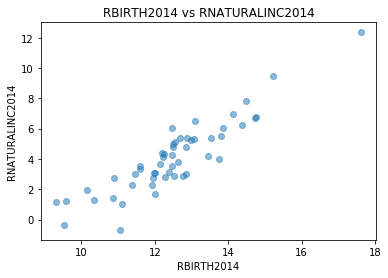

In [30]:
plt.plot(data['RBIRTH2014'], data['RNATURALINC2014'], 'o', alpha = 0.5)
plt.xlabel('RBIRTH2014')
plt.ylabel('RNATURALINC2014')
plt.title('RBIRTH2014 vs RNATURALINC2014')
pass

Зависимость числа рождаемости и естественного прироста населения в 2014г для "бедных" и "богатых" штатов

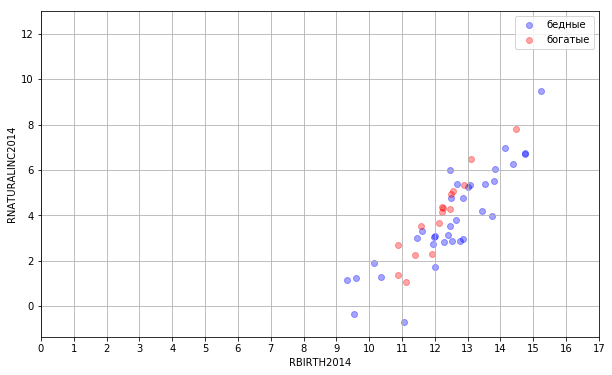

In [31]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['class'] == 0]['RBIRTH2014'],
            data[data['class'] == 0]['RNATURALINC2014'],
            alpha = 0.35,
            label = 'бедные',
            color = 'b')

plt.scatter(data[data['class'] == 1]['RBIRTH2014'],
            data[data['class'] == 1]['RNATURALINC2014'],
            alpha = 0.35,
            label = 'богатые',
            color = 'r')

plt.xlabel('RBIRTH2014')
plt.xticks(range(18))
plt.xlim(0, 17)
plt.ylabel('RNATURALINC2014')
plt.legend()
plt.grid()

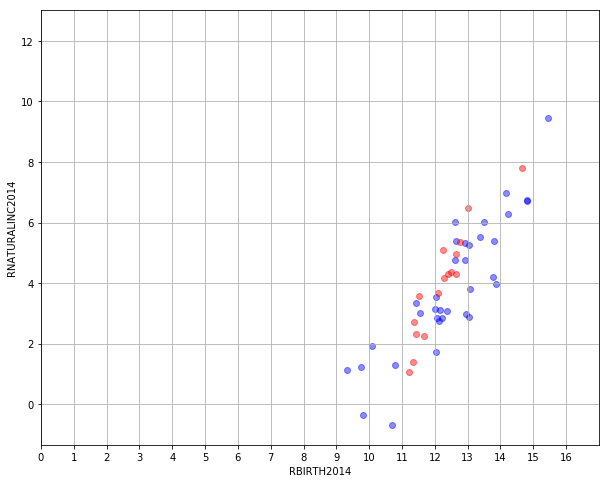

In [32]:
np.random.seed(0)
education_num_rnd = data['RBIRTH2014'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(education_num_rnd[data['class'] == 0],
            data[data['class'] == 0]['RNATURALINC2014'],
            alpha = 0.45,
            label = 'бедные',
            color = 'b')

plt.scatter(education_num_rnd[data['class'] == 1],
            data[data['class'] == 1]['RNATURALINC2014'],
            alpha = 0.45,
            label = 'богатые',
            color = 'r')

plt.xlabel('RBIRTH2014')
plt.xticks(range(17))
plt.xlim(0, 17)
plt.ylabel('RNATURALINC2014')
plt.grid()

Параметры столбцов

In [33]:
data.describe(include = 'all')

,StateCodes,State,Region,Division,Coast,Great Lakes,TotalC2014,TotalP2014,TotalE2014,TotalPrice2014,...,GDP2014Q4,GDP2014,POPESTIMATE2014,RBIRTH2014,RDEATH2014,RNATURALINC2014,RINTERNATIONALMIG2014,RDOMESTICMIG2014,RNETMIG2014,class
count,52,52,51.000000,51.000000,51.000000,51.000000,5.200000e+01,5.200000e+01,5.200000e+01,52.000000,...,5.200000e+01,5.200000e+01,5.200000e+01,52.000000,52.000000,52.000000,52.000000,51.000000,52.000000,52.000000
unique,52,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GA,Florida,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.666667,5.117647,0.450980,0.156863,3.784461e+06,3.268971e+06,5.365716e+04,22.177885,...,6.731017e+05,6.628131e+05,1.226373e+07,12.482468,8.396861,4.085607,2.501026,-0.086251,2.416433,0.307692
std,NaN,NaN,1.051982,2.534932,0.502543,0.367290,1.354064e+07,1.220958e+07,1.919856e+05,3.510066,...,2.416833e+06,2.380005e+06,4.392064e+07,1.499895,1.175816,2.342039,1.569279,4.895949,4.794439,0.466041
min,NaN,NaN,1.000000,1.000000,0.000000,0.000000,1.398970e+05,3.600000e+02,2.320300e+03,15.490000,...,3.040800e+04,2.966175e+04,5.841530e+05,9.313705,5.236680,-0.685220,0.628523,-13.754494,-10.884734,0.000000
25%,NaN,NaN,2.000000,3.000000,0.000000,0.000000,6.552158e+05,2.499908e+05,8.619625e+03,20.000000,...,9.139100e+04,9.019981e+04,1.796360e+06,11.836771,7.798200,2.813582,1.392360,-2.519482,-0.273974,0.000000
50%,NaN,NaN,3.000000,5.000000,0.000000,0.000000,1.457408e+06,6.789490e+05,2.118630e+04,21.450000,...,2.033670e+05,2.004312e+05,4.531566e+06,12.474878,8.199872,3.888533,2.019803,-1.192172,1.524206,0.000000
75%,NaN,NaN,3.500000,7.500000,1.000000,0.000000,2.461348e+06,1.674306e+06,3.493473e+04,23.935000,...,4.572272e+05,4.494842e+05,7.377720e+06,13.074035,9.219229,5.363381,3.142864,3.710544,5.357469,1.000000


Уникальные значения в столбце

In [34]:
data['Region'].unique()

array([  3.,   4.,   1.,   2.,  nan])

In [35]:
data['TotalC2014'].unique()

array([ 1958221,   603119,  1422590,  1114409,  7620082,  1477177,
         750019,   274013,  4121680,  2850990,   281206,   519935,
        4042313,  2931630,  1541900,  1132354,  1770741,  4279443,
         410530,  1400614,  1437640,  2881550,  1912065,  1155549,
        1903839,   403446,   864347,   660256,   310142,  2340188,
         679136,  3742892,  2554776,   640095,  3809648,  1679856,
         987145,  3902434,   204459,  1632085,   391857,  2194512,
       12899498,   797995,   139897,  2430205,  2011941,   752942,
        1868867,   535612,   178929, 98385210], dtype=int64)

In [36]:
for name in data[0:51]['Region'].unique():
    print(name, data[0:51]['TotalC2014'][data[0:51]['Region'] == name].iloc[0])

3.0 1958221
4.0 603119
1.0 750019
2.0 4042313


Удалим значения ВВП

In [37]:
data = data.drop('GDP2014Q4', axis = 1)
data = data.drop('GDP2014Q3', axis = 1)
data = data.drop('GDP2014Q2', axis = 1)
data = data.drop('GDP2014Q1', axis = 1)
data = data.drop('GDP2014', axis = 1)

Готовим данные

In [38]:
data['Region'].dtype.name

'float64'

In [39]:
data['TotalC2014'].dtype.name

'int64'

In [40]:
categorical_columns = ['Region', 'Division', 'Coast', 'Great Lakes', 'class']
numerical_columns   = [c for c in data.columns if ((data[c].name != 'Region') & (data[c].name != 'Division') & (data[c].name != 'Coast') & (data[c].name != 'Great Lakes') & (data[c].name != 'StateCodes') & (data[c].name != 'State')  & (data[c].name != 'class'))]
print(categorical_columns)
print()
print(numerical_columns)

['Region', 'Division', 'Coast', 'Great Lakes', 'class']

['TotalC2014', 'TotalP2014', 'TotalE2014', 'TotalPrice2014', 'TotalC10-11', 'TotalC11-12', 'TotalC12-13', 'TotalC13-14', 'TotalP10-11', 'TotalP11-12', 'TotalP12-13', 'TotalP13-14', 'TotalE10-11', 'TotalE11-12', 'TotalE12-13', 'TotalE13-14', 'TotalPrice10-11', 'TotalPrice11-12', 'TotalPrice12-13', 'TotalPrice13-14', 'BiomassC2014', 'CoalC2014', 'CoalP2014', 'CoalE2014', 'CoalPrice2014', 'ElecC2014', 'ElecE2014', 'ElecPrice2014', 'FossFuelC2014', 'GeoC2014', 'GeoP2014', 'HydroC2014', 'HydroP2014', 'NatGasC2014', 'NatGasE2014', 'NatGasPrice2014', 'LPGC2014', 'LPGE2014', 'LPGPrice2014', 'POPESTIMATE2014', 'RBIRTH2014', 'RDEATH2014', 'RNATURALINC2014', 'RINTERNATIONALMIG2014', 'RDOMESTICMIG2014', 'RNETMIG2014']


In [41]:
for c in numerical_columns:
    print(c, data[c].unique())

TotalC2014 [ 1958221   603119  1422590  1114409  7620082  1477177   750019   274013
  4121680  2850990   281206   519935  4042313  2931630  1541900  1132354
  1770741  4279443   410530  1400614  1437640  2881550  1912065  1155549
  1903839   403446   864347   660256   310142  2340188   679136  3742892
  2554776   640095  3809648  1679856   987145  3902434   204459  1632085
   391857  2194512 12899498   797995   139897  2430205  2011941   752942
  1868867   535612   178929 98385210]
TotalP2014 [ 1353725  1475129   635050  1454325  2413494  3041634   197271     4189
   553738   597955    27166   154936  2683815  1123098   757014   880650
  2055121  2852411   151257   250058   124671   682788   466967   402842
   199586  1161804   401699    71140   161033   388386  2514744   871720
   595660  3261360  1547368  3572829   479935  7087392     4304   675110
   249789   499501 17597105  1170681    85874   979780  1027404  4154063
   298603  9361755      360 87228228]
TotalE2014 [   24146.5    

Обрабатываем пропущенные значения. Так как они содержатся только в последней строке(США), и эта строка является обобщением других, просто удалим ее

In [42]:
data = data.dropna(axis = 0)

In [43]:
data['Region'].unique()

array([ 3.,  4.,  1.,  2.])

In [44]:
data['Division'].unique()

array([ 6.,  9.,  8.,  7.,  1.,  5.,  3.,  4.,  2.])

Векторизация

In [45]:
nonbinary_columns = ['Region', 'Division']

In [46]:
binary_columns = ['Coast', 'Great Lakes', 'class']

In [47]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Region', 'Division'], dtype='object')


Нормализация количественных признаков

In [48]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,TotalC2014,TotalP2014,TotalE2014,TotalPrice2014,TotalC10-11,TotalC11-12,TotalC12-13,TotalC13-14,TotalP10-11,TotalP11-12,...,LPGC2014,LPGE2014,LPGPrice2014,POPESTIMATE2014,RBIRTH2014,RDEATH2014,RNATURALINC2014,RINTERNATIONALMIG2014,RDOMESTICMIG2014,RNETMIG2014
count,5.100000e+01,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,5.100000e+01,51.000000,51.000000,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,1.929544e+06,1.622712e+06,27356.827451,22.194510,99.643668,97.531464,102.715583,101.044434,108.452052,99.534259,...,6.058920e+04,1150.047059,28.537647,6.252099e+06,12.482951,8.401397,4.081554,2.488594,-0.086251,2.402342
std,2.126122e+06,2.882341e+06,30124.415618,3.542924,3.075405,2.483354,2.469820,1.916909,27.058871,9.829692,...,2.356901e+05,3624.369665,4.325561,7.124005e+06,1.514815,1.187056,2.365159,1.582306,4.895949,4.841058
min,1.398970e+05,3.600000e+02,2320.300000,15.490000,95.093542,86.666888,95.651899,95.951149,84.116458,82.538754,...,2.400000e+01,0.800000,15.030000,5.841530e+05,9.313705,5.236680,-0.685220,0.628523,-13.754494,-10.884734
25%,6.501755e+05,2.499235e+05,8482.950000,19.990000,97.567507,96.957840,101.419546,100.106409,98.777954,92.921319,...,7.280000e+03,201.150000,26.370000,1.742395e+06,11.759702,7.779783,2.789954,1.380524,-2.519482,-0.326182
50%,1.437640e+06,6.751100e+05,20496.900000,21.460000,99.492653,97.574945,102.580081,101.273541,103.256293,98.427929,...,1.098200e+04,329.900000,27.560000,4.413457e+06,12.476234,8.220936,3.796297,2.010735,-1.192172,1.470449
75%,2.385196e+06,1.511248e+06,34065.750000,24.100000,100.354894,98.866399,104.292679,101.972854,108.725805,102.587735,...,2.724000e+04,782.250000,31.935000,6.903469e+06,13.082872,9.228108,5.368238,3.084902,3.710544,5.499192
max,1.289950e+07,1.759710e+07,162555.800000,37.380000,111.014300,104.506649,108.313075,107.680519,285.263158,140.618122,...,1.598099e+06,24824.500000,38.400000,3.880250e+07,17.601689,11.736211,12.365009,6.074495,12.265101,14.028192


In [49]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [50]:
data_numerical.describe()

,TotalC2014,TotalP2014,TotalE2014,TotalPrice2014,TotalC10-11,TotalC11-12,TotalC12-13,TotalC13-14,TotalP10-11,TotalP11-12,...,LPGC2014,LPGE2014,LPGPrice2014,POPESTIMATE2014,RBIRTH2014,RDEATH2014,RNATURALINC2014,RINTERNATIONALMIG2014,RDOMESTICMIG2014,RNETMIG2014
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,...,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
mean,4.571507e-17,-3.918434e-17,2.242215e-16,-1.190769e-15,2.964949e-15,-7.074951e-15,9.751459e-15,-4.666202e-15,-2.089832e-16,1.189680e-15,...,1.850372e-17,-5.659961e-17,5.942959e-16,-1.741526e-17,-3.191347e-15,-2.884403e-16,9.143013e-17,-3.221824e-16,-1.632681e-17,-8.707632e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.417426e-01,-5.628590e-01,-8.311042e-01,-1.892366e+00,-1.479521e+00,-4.374960e+00,-2.859999e+00,-2.657031e+00,-8.993573e-01,-1.728997e+00,...,-2.569696e-01,-3.170888e-01,-3.122751e+00,-7.956123e-01,-2.092166e+00,-2.666022e+00,-2.015413e+00,-1.175544e+00,-2.791745e+00,-2.744664e+00
25%,-6.017383e-01,-4.762754e-01,-6.265309e-01,-6.222289e-01,-6.750857e-01,-2.309877e-01,-5.247497e-01,-4.893426e-01,-3.575204e-01,-6.727514e-01,...,-2.261834e-01,-2.618102e-01,-5.011251e-01,-6.330293e-01,-4.774499e-01,-5.236598e-01,-5.460942e-01,-7.002878e-01,-4.969886e-01,-5.636213e-01
50%,-2.313623e-01,-3.287611e-01,-2.277199e-01,-2.073174e-01,-4.910417e-02,1.750893e-02,-5.486319e-02,1.195191e-01,-1.920168e-01,-1.125498e-01,...,-2.104763e-01,-2.262868e-01,-2.260163e-01,-2.580911e-01,-4.433996e-03,-1.520243e-01,-1.206077e-01,-3.020011e-01,-2.258847e-01,-1.924978e-01
75%,2.143113e-01,-3.867102e-02,2.227071e-01,5.378298e-01,2.312627e-01,5.375531e-01,6.385468e-01,4.843321e-01,1.011695e-02,3.106381e-01,...,-1.414959e-01,-1.014789e-01,7.854133e-01,9.143310e-02,3.960358e-01,6.964376e-01,5.440160e-01,3.768607e-01,7.754974e-01,6.397051e-01
max,5.159607e+00,5.542160e+00,4.488020e+00,4.286146e+00,3.697280e+00,2.808776e+00,2.266356e+00,3.461868e+00,6.534312e+00,4.179568e+00,...,6.523437e+00,6.532019e+00,2.280017e+00,4.569115e+00,3.379117e+00,2.809315e+00,3.502283e+00,2.266250e+00,2.522770e+00,2.401510e+00


Соединяем в одну таблицу

In [51]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)

(51, 51)


In [52]:
data.describe()

,TotalC2014,TotalP2014,TotalE2014,TotalPrice2014,TotalC10-11,TotalC11-12,TotalC12-13,TotalC13-14,TotalP10-11,TotalP11-12,...,RDEATH2014,RNATURALINC2014,RINTERNATIONALMIG2014,RDOMESTICMIG2014,RNETMIG2014,Region,Division,Coast,Great Lakes,class
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,...,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000
mean,4.571507e-17,-3.918434e-17,2.242215e-16,-1.190769e-15,2.964949e-15,-7.074951e-15,9.751459e-15,-4.666202e-15,-2.089832e-16,1.189680e-15,...,-2.884403e-16,9.143013e-17,-3.221824e-16,-1.632681e-17,-8.707632e-18,2.666667,5.117647,0.450980,0.156863,0.294118
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.051982,2.534932,0.502543,0.367290,0.460179
min,-8.417426e-01,-5.628590e-01,-8.311042e-01,-1.892366e+00,-1.479521e+00,-4.374960e+00,-2.859999e+00,-2.657031e+00,-8.993573e-01,-1.728997e+00,...,-2.666022e+00,-2.015413e+00,-1.175544e+00,-2.791745e+00,-2.744664e+00,1.000000,1.000000,0.000000,0.000000,0.000000
25%,-6.017383e-01,-4.762754e-01,-6.265309e-01,-6.222289e-01,-6.750857e-01,-2.309877e-01,-5.247497e-01,-4.893426e-01,-3.575204e-01,-6.727514e-01,...,-5.236598e-01,-5.460942e-01,-7.002878e-01,-4.969886e-01,-5.636213e-01,2.000000,3.000000,0.000000,0.000000,0.000000
50%,-2.313623e-01,-3.287611e-01,-2.277199e-01,-2.073174e-01,-4.910417e-02,1.750893e-02,-5.486319e-02,1.195191e-01,-1.920168e-01,-1.125498e-01,...,-1.520243e-01,-1.206077e-01,-3.020011e-01,-2.258847e-01,-1.924978e-01,3.000000,5.000000,0.000000,0.000000,0.000000
75%,2.143113e-01,-3.867102e-02,2.227071e-01,5.378298e-01,2.312627e-01,5.375531e-01,6.385468e-01,4.843321e-01,1.011695e-02,3.106381e-01,...,6.964376e-01,5.440160e-01,3.768607e-01,7.754974e-01,6.397051e-01,3.500000,7.500000,1.000000,0.000000,1.000000
max,5.159607e+00,5.542160e+00,4.488020e+00,4.286146e+00,3.697280e+00,2.808776e+00,2.266356e+00,3.461868e+00,6.534312e+00,4.179568e+00,...,2.809315e+00,3.502283e+00,2.266250e+00,2.522770e+00,2.401510e+00,4.000000,9.000000,1.000000,1.000000,1.000000


Х и у

In [53]:
X = data.drop(('class'), axis = 1) # выбрасываем столбец 'class'
y = data['class']
feature_names = X.columns

In [54]:
type(feature_names)

pandas.core.indexes.base.Index

In [55]:
feature_names

Index(['TotalC2014', 'TotalP2014', 'TotalE2014', 'TotalPrice2014',
       'TotalC10-11', 'TotalC11-12', 'TotalC12-13', 'TotalC13-14',
       'TotalP10-11', 'TotalP11-12', 'TotalP12-13', 'TotalP13-14',
       'TotalE10-11', 'TotalE11-12', 'TotalE12-13', 'TotalE13-14',
       'TotalPrice10-11', 'TotalPrice11-12', 'TotalPrice12-13',
       'TotalPrice13-14', 'BiomassC2014', 'CoalC2014', 'CoalP2014',
       'CoalE2014', 'CoalPrice2014', 'ElecC2014', 'ElecE2014', 'ElecPrice2014',
       'FossFuelC2014', 'GeoC2014', 'GeoP2014', 'HydroC2014', 'HydroP2014',
       'NatGasC2014', 'NatGasE2014', 'NatGasPrice2014', 'LPGC2014', 'LPGE2014',
       'LPGPrice2014', 'POPESTIMATE2014', 'RBIRTH2014', 'RDEATH2014',
       'RNATURALINC2014', 'RINTERNATIONALMIG2014', 'RDOMESTICMIG2014',
       'RNETMIG2014', 'Region', 'Division', 'Coast', 'Great Lakes'],
      dtype='object')

In [56]:
print(X.shape)
print(y.shape)
N, d = X.shape

(51, 50)
(51,)


In [57]:
type(X)

pandas.core.frame.DataFrame

In [58]:
type(y)

pandas.core.series.Series

Обучающие и тестовые выборки. Размер тестовой выборки 30%

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

35 16


kNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [61]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [62]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.2 0.3125


In [63]:
err_test = 1 - knn.score(X_test, y_test) # Другой способ

In [64]:
err_test

0.3125

In [65]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[10  0]
 [ 5  1]]


Подбор параметров

In [66]:
# Долго!
from sklearn.model_selection import GridSearchCV
nnb = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.0857142857143 1


Отптимальное значение параметра k = 1
Посчитаем при данном параметре

In [67]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.0 0.25


# Домашнее задание №2

Обучаем классификатор

In [68]:
from sklearn.neural_network import MLPClassifier

In [83]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100, 100,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42, alpha = 0.001)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

2 скрытых слоя. Для одного результат тот же 

Проверяем качество классификатора

In [84]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

Ошибки на обучающей и тестовой выборках:

In [85]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0 0.125


In [86]:
print(mlp_model.score(X_train, y_train), mlp_model.score(X_test, y_test))

1.0 0.875


In [87]:
print(1 - mlp_model.score(X_test, y_test))

0.125


Подбор гиперпараметров. Подберем оптимальное значение параметра регуляризации alpha

In [92]:
alpha_arr = np.logspace(-4, 2, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100, 100), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

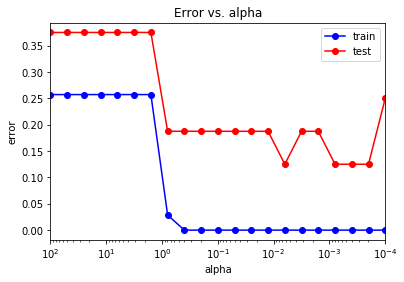

In [93]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Для значений alpha порядком больше чем 10^0 имеет место переобучение

Минимальное значение ошибки:

In [94]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.125


Минимальная ошибка на тестовой выборке: 0.125.  Этот результат лучше, чем результат, полученный методом kNN с оптимальным параметром k

Оптимальное значение alpha:

In [95]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[ 0.00019953  0.00039811  0.00079433  0.00630957]


In [96]:
alpha_opt = alpha_opt[0]

Классификатор при найденном оптимальном значении alpha:

Повторим обучение:

In [100]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100, 100,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.0
0.125


Минимальная ошибка: 0.125